# chapter 6: More advanced optimization principles

# <center> ![picture](pictures/title.jpg)

# Chapter 6: More Advanced Optimization Principles

In this chapter, we delve into advanced optimization principles building on the foundations laid out in Chapter 2. We explore sophisticated approaches to optimization, extending our understanding beyond univariate cases to multivariate scenarios.

## 6.1 Decreasing Gradient in Multivariate Functions

To extend the discussion of gradient descent from univariate to multivariate cases, we leverage the multivariate Taylor series approximation. The second-order Taylor approximation for a real function of several variables, $(c(\mathbf{w}))$, is expressed as:

$$[ \hat{c}(\mathbf{w}) \approx c(\mathbf{w}_0) + \nabla c(\mathbf{w}_0)^T (\mathbf{w} - \mathbf{w}_0) + \frac{1}{2} (\mathbf{w} - \mathbf{w}_0)^T H_{c(\mathbf{w}_0)} (\mathbf{w} - \mathbf{w}_0) ]$$

Here, $(\nabla c(\mathbf{w}_0))$ is the gradient of the function $(c)$ evaluated at $(\mathbf{w}_0)$, and $(H_{c(\mathbf{w}_0)})$ is the Hessian matrix evaluated at $(\mathbf{w}_0)$.

### 6.1.1 Gradient and Hessian

The gradient, $(\nabla c(\mathbf{w}_0))$, is a vector containing partial derivatives of $(c)$ with respect to each component of $(\mathbf{w})$. The Hessian matrix, $(H_{c(\mathbf{w}_0)})$, reflects the curvature of the function at $(\mathbf{w}_0)$ and provides information about the rate of change of the gradient.

### 6.1.2 Multivariate Update

To find the optimal solution, we aim to minimize the gradient of the Taylor approximation. The update rule for the multivariate case is:

$$[ \mathbf{w}_{i+1} = \mathbf{w}_i - (H_{c(\mathbf{w}_i)})^{-1} \nabla c(\mathbf{w}_i) ]$$

Here, both the gradient and the Hessian are evaluated at the current point $(\mathbf{w}_i)$. Choosing between first-order and second-order updates depends on the computational complexity, with second-order updates involving the inversion of the Hessian.

### 6.1.3 Managing Complexity

The computational complexity of second-order gradient descent is higher than that of first-order gradient descent, making the latter more favorable in many scenarios. Careful consideration of the trade-offs, especially in terms of Hessian calculations, is crucial for efficient optimization.

## 6.2 Properties of the Hessian

The Hessian matrix provides insights into the local curvature of the function. Its eigenvalues reflect the curvature, and a positive definite Hessian ensures a local minimum. Understanding the Hessian's properties aids in assessing the convergence and stability of optimization algorithms.

### 6.2.1 Directional Derivative

Considering the directional derivative helps visualize how the function changes in a specific direction. The Hessian eigenvalues indicate the curvature in that direction, essential for determining whether a point is a local minimum.

### 6.2.2 Example: Linear Regression Hessian

For linear regression, the Hessian matrix is $(2\mathbf{X}^T\mathbf{X})$, and its positive semi-definiteness confirms the convexity of the objective function. The positive definiteness of the Hessian, when the columns of $(\mathbf{X})$ are linearly independent, ensures a unique absolute minimum.

## 6.3 Managing Large Datasets

Dealing with large datasets involves optimizing algorithms for efficiency. Stochastic gradient descent, an incremental approach, processes samples iteratively. The algorithm's convergence is conditioned on step size reduction over time, ensuring effective convergence even with limited computational resources.

### 6.3.1 Stochastic Gradient Descent Algorithm

A stochastic gradient descent algorithm randomly selects one data point at a time, updating the weights iteratively. This approach proves effective for handling vast datasets, providing a modern solution to big data challenges.

## 6.4 Non-smooth but Still Continuous Optimization

In cases where targets are continuous but non-smooth, employing proximal methods becomes essential. Proximal methods combine descent slopes with thresholding, allowing optimization in the presence of indistinguishable points. The proximal operator, applied elementwise, facilitates optimization in scenarios like Lasso regularization.

### 6.4.1 Proximal Operator

The proximal operator projects solutions back into the space of sparse solutions, crucial for optimization with non-smooth objectives. For example, the proximal operator for $(\ell_1)$ regularization is applied elementwise and involves thresholding.

### 6.4.2 Batch Gradient Descent with $(\ell_1)$ Regularization

Algorithm 4 presents a batch gradient descent algorithm for $(\ell_1)$ regularized linear regression. This algorithm, known as Iterative Soft Thresholding Algorithm (ISTA), leverages the proximal operator to optimize non-smooth objectives effectively.

## 6.5 More Ways to Choose Step Sizes

Choosing an appropriate step size is vital for optimization algorithms. Pseudo-second-order methods, such as LBFGS, Adadelta, and Adam, provide alternatives to the computationally heavy inverse Hessian. These methods offer efficient approximations for step size selection, contributing to the effectiveness of descent algorithms.

In the next sections, we will explore these concepts further, providing practical implementations and code examples. Additionally, we will discuss considerations for selecting appropriate step sizes and compare the efficiency of various optimization techniques.

Below are two Python code snippets that implement the concepts discussed in Chapter 6. The first code performs multivariate gradient descent with second-order updates, and the second code demonstrates stochastic gradient descent for handling large datasets. Visualization is done using the `matplotlib` library.

### Code 1: Multivariate Gradient Descent

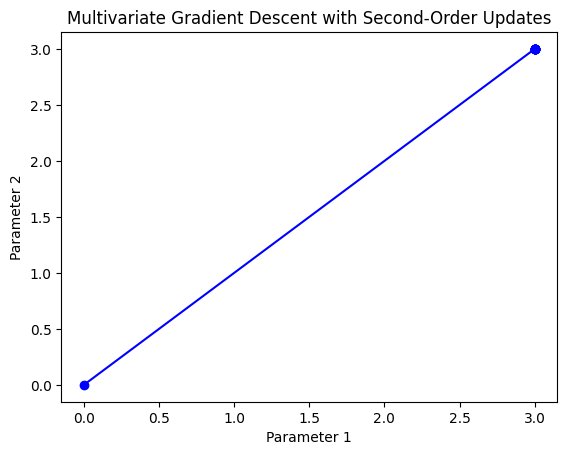

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def objective_function(w):
    return np.sum((w - 3) ** 2)

def gradient(w):
    return 2 * (w - 3)

def hessian(w):
    return 2 * np.eye(len(w))

def multivariate_gradient_descent(w_initial, learning_rate, num_iterations):
    w = w_initial
    trajectory = [w]

    for _ in range(num_iterations):
        grad = gradient(w)
        hess = hessian(w)

        w = w - np.linalg.inv(hess) @ grad

        trajectory.append(w)

    return np.array(trajectory)

def plot_trajectory(trajectory):
    plt.plot(trajectory[:, 0], trajectory[:, 1], marker='o', linestyle='-', color='b')
    plt.title('Multivariate Gradient Descent with Second-Order Updates')
    plt.xlabel('Parameter 1')
    plt.ylabel('Parameter 2')
    plt.show()

initial_point = np.array([0.0, 0.0])
learning_rate = 0.1
iterations = 10
trajectory = multivariate_gradient_descent(initial_point, learning_rate, iterations)
plot_trajectory(trajectory)


### Code 2: Stochastic Gradient Descent

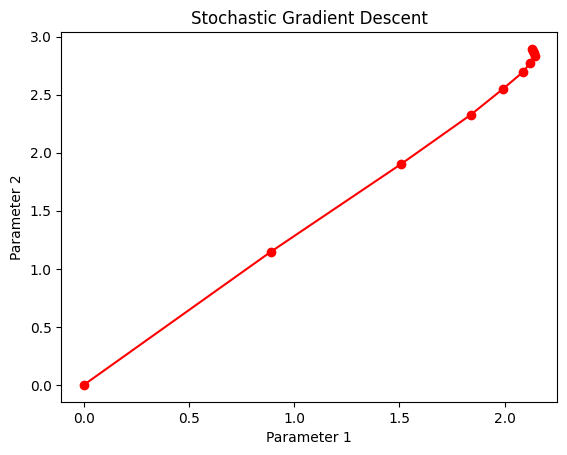

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def objective_function(w, X, y):
    return 0.5 * np.mean((X.dot(w) - y) ** 2)

def gradient(w, X, y):
    return X.T.dot(X.dot(w) - y) / len(y)

def stochastic_gradient_descent(w_initial, X, y, learning_rate, num_epochs):
    w = w_initial
    trajectory = [w]

    for epoch in range(num_epochs):
        for i in range(len(y)):
            random_index = np.random.randint(len(y))
            xi = X[random_index:random_index + 1]
            yi = y[random_index:random_index + 1]

            grad = gradient(w, xi, yi)

            # Update weights
            w = w - learning_rate * grad

        trajectory.append(w)

    return np.array(trajectory)

def plot_trajectory(trajectory):
    plt.plot(trajectory[:, 0], trajectory[:, 1], marker='o', linestyle='-', color='r')
    plt.title('Stochastic Gradient Descent')
    plt.xlabel('Parameter 1')
    plt.ylabel('Parameter 2')
    plt.show()

initial_weights = np.zeros(2)
X_data = np.random.rand(100, 2)
y_data = X_data.dot(np.array([2, 3])) + np.random.normal(scale=0.1, size=100)
learning_rate = 0.01
epochs = 10
trajectory = stochastic_gradient_descent(initial_weights, X_data, y_data, learning_rate, epochs)
plot_trajectory(trajectory)
